In [1]:
import transformers
from transformers import AutoTokenizer

model_name = "google-t5/t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
type(tokenizer)  #### recognize the class type

C:\Users\david\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


transformers.models.t5.tokenization_t5_fast.T5TokenizerFast

In [7]:
##### how to tokenize a sentence
sentence = "hello, this is a sentence!"

tokens = tokenizer(sentence)                 # we can use directly the input or we can call the method __call__ to compute the toekns
print(tokens)                                # return a dictionary 

tokens = tokenizer.__call__(sentence)        # is a dictionary keys: input_ids - attention_mask
print(tokens)                                

print(type(tokens["input_ids"]))             # the data structure in tokens["input_ids"] is a list

### we can inverse the process, using the decoder 
tok_dec = tokenizer.decode(tokens["input_ids"])   ## is added the term </s> to indicate the end of the sequence
print(tok_dec)    ### we have also the </s> that is a special token called : End Of Sequence

{'input_ids': [21820, 6, 48, 19, 3, 9, 7142, 55, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [21820, 6, 48, 19, 3, 9, 7142, 55, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
<class 'list'>
hello, this is a sentence!</s>


In [13]:
import random 

vocabulary = tokenizer.get_vocab()   ### to get the entire set of tokens 
print(len(vocabulary))               ### the size is 32100 tokens


random_elem = random.sample(range(0, len(vocabulary) + 1), 10)
print(random_elem)

reverse_vocab = {id: word for word, id in vocabulary.items()}  #### we map from word- integer to integer-word
print(vocabulary)             # this is the vocabulary
print(reverse_vocab)          # this is the reverse vocabulary

vocab_keys = list(reverse_vocab.keys())


32100
[19445, 20345, 20770, 2667, 20607, 19048, 25404, 16166, 18021, 13012]
{'<extra_id_53>': 32046, 'March': 25019, 'Carlton': 30339, '▁were': 130, '▁breathe': 13418, '▁plimb': 20849, '▁Fragen': 6906, '▁unlikely': 9909, 'eva': 4721, 'blick': 10284, 'urgeon': 19623, '▁lectur': 22111, 'krieg': 22856, 'zugleich': 24399, 'interest': 19405, '▁ceremonies': 25934, '▁kurze': 15012, 'sanitary': 30688, '▁Medi': 11816, '▁Turkish': 15423, 'ituated': 29191, 'cron': 18036, '▁chinez': 29240, '▁socialist': 23737, '▁autobuz': 27672, '▁companies': 688, '▁Netflix': 11894, 'RN': 14151, 'formulaire': 23084, 'AA': 5498, '▁Long': 3230, 'PAC': 19324, '▁quarter': 2893, 'ico': 5807, '▁informatii': 10640, 'lässig': 17130, '▁Algeria': 30805, '▁Kon': 2974, '▁nombre': 6053, '▁jaw': 9657, '<extra_id_38>': 32061, '▁Agreement': 7139, '▁Armenia': 18715, '2': 357, '▁publisher': 14859, 'université': 21686, 'Currently': 8212, 'Throughout': 11714, '▁Battery': 20831, '▁resilient': 24139, '▁apropie': 30036, '▁carving': 2506

In [14]:
### i am printing the 10 random elements
for _ in random_elem:
    print(reverse_vocab[_])

▁Danny
▁installment
▁smiling
▁flat
rzte
▁remarc
RCA
élection
▁fața
▁nearest


In [15]:
num_token = vocabulary["</s>"]
print(num_token)
print(tokens["input_ids"])  ### the last token is 1 the </s>

1
[21820, 6, 48, 19, 3, 9, 7142, 55, 1]


In [22]:
tokenizer("hello!</s></s>")  # we have 1 more 1 value, because the tokenizer add it

{'input_ids': [21820, 55, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1]}

In [21]:
tokenizer.tokenize(sentence) ### we can see how is tokenize the sentence

['▁hello', ',', '▁this', '▁is', '▁', 'a', '▁sentence', '!']

In [23]:
print(tokenizer.tokenize("hello    ,world"))     # multiple spaces are compacted into a single one!
print(tokenizer.tokenize("hello    , world"))    # for world we have 2 different mapping

['▁hello', '▁', ',', 'world']
['▁hello', '▁', ',', '▁world']


In [ ]:
""" 
Special attributes are available in the tokenizer class to access these special tokens. Some examples are:

pad_token is the token used for padding (as discussed later),
bos_token and eos_token tokens are used to indicate the beginning and end of the input text, respectively,
mask_token is used for masking tokens during training (e.g., for the masked LM task, with BERT),
sep_token is used to separate sentences in the input text (e.g., next sentence prediction, with BERT),
cls_token is used to indicate the beginning of the input text (e.g., for classification tasks, with BERT),
unk_token is used to indicate unknown tokens (i.e., tokens that are not in the vocabulary).
"""

In [24]:
# if the model don't use that special token then is set to 0
tokenizer.eos_token, tokenizer.pad_token, tokenizer.bos_token

('</s>', '<pad>', None)

In [25]:
# corresponding id
tokenizer.eos_token_id, tokenizer.pad_token_id, tokenizer.bos_token_id

(1, 0, None)

## Batch encoding/decoding

we can tokenize more sentence in one time

In [33]:
sentences = [
    "this is the first sentence",
    "instead, this is the second sequence!"
]

tokens = tokenizer.__call__(sentences)
print(tokens)

{'input_ids': [[48, 19, 8, 166, 7142, 1], [1446, 6, 48, 19, 8, 511, 5932, 55, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [34]:
### Now each sentence has the same length
tokens = tokenizer.__call__(sentences, padding=True)
tokens

{'input_ids': [[48, 19, 8, 166, 7142, 1, 0, 0, 0], [1446, 6, 48, 19, 8, 511, 5932, 55, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}

Instead of getting token IDs directly, we may look at the tokens being produced, directly. We use the tokenize() method in this case.

In [38]:
list_tok  = tokenizer.tokenize(sentences)
print(len(list_tok))
list_tok

13


['▁this',
 '▁is',
 '▁the',
 '▁first',
 '▁sentence',
 '▁instead',
 ',',
 '▁this',
 '▁is',
 '▁the',
 '▁second',
 '▁sequence',
 '!']

In [39]:
tokens = tokenizer(sentences)

print(len(tokens))

for tok in tokens["input_ids"]:
    print(tok)

2
[48, 19, 8, 166, 7142, 1]
[1446, 6, 48, 19, 8, 511, 5932, 55, 1]


We can pad each input sentece to have the same length
    -having attention value mask equal to 0, we force the model to avoid the attention of the tokens

In [40]:
tokens = tokenizer(sentences, padding=True)

for tok, att in zip(tokens["input_ids"], tokens["attention_mask"]):
    print(tok, att)

[48, 19, 8, 166, 7142, 1, 0, 0, 0] [1, 1, 1, 1, 1, 1, 0, 0, 0]
[1446, 6, 48, 19, 8, 511, 5932, 55, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1]


we can have tokens in format tensor flow, in this manner they can feed easily in the model

In [41]:
# note: we pass return_tensors="pt" to get PyTorch tensors
# (the library also supports TensorFlow tensors, but we
# don't care about them!)
tokens = tokenizer(sentences, padding=True, return_tensors="pt")
print(tokens["input_ids"])
print(tokens["attention_mask"])

tensor([[  48,   19,    8,  166, 7142,    1,    0,    0,    0],
        [1446,    6,   48,   19,    8,  511, 5932,   55,    1]])
tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]])


## Model analysis

In [17]:
model_name = "google-t5/t5-base"

In [18]:
import transformers
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
print(type(model))

<class 'transformers.models.t5.modeling_t5.T5ForConditionalGeneration'>


In [ ]:
### to see the specification of the model 
##model 

## Tokens embedding

In [5]:
words = [
    "chair",
    "table",
    "plate",
    "knife",
    "spoon",
    "horse",
    "goat",
    "sheep",
    "cat",
    "dog",
]

In [10]:
word_tokens = tokenizer(words, return_tensors="pt", padding=True)["input_ids"][:, 0]
print(word_tokens)
token_embeddings = model.shared(word_tokens).cpu().detach().numpy()
print(token_embeddings.shape)

tensor([ 3533,   953,  3829, 10821, 14987,  4952, 18174, 15184,  1712,  1782])
(10, 768)


In [12]:
### we get the first element 
first_el = token_embeddings[0]     ### print it
first_el

array([-2.9750000e+01,  2.0250000e+01,  8.2500000e+00,  7.5000000e+00,
       -6.8750000e+00,  6.3125000e+00,  5.0937500e+00,  3.2000000e+01,
       -1.6375000e+01,  3.0312500e+00, -1.4609375e+00,  6.9375000e+00,
        1.2062500e+01, -9.1250000e+00,  5.2187500e+00, -3.4500000e+01,
       -1.2312500e+01, -9.1406250e-01,  8.1250000e+00,  3.5500000e+01,
       -1.9250000e+01, -8.6250000e+00,  3.1718750e+00, -1.1621094e-01,
        9.6875000e+00, -3.0000000e+01,  6.6875000e+00, -4.7187500e+00,
        1.4125000e+01, -6.0625000e+00,  1.1625000e+01, -3.5250000e+01,
       -7.5000000e+00, -1.1625000e+01,  2.7375000e+01,  8.1250000e+00,
       -2.6000000e+01,  4.4687500e+00,  1.3875000e+01, -2.5875000e+01,
       -7.0937500e+00, -2.1625000e+01, -2.9500000e+01,  4.1500000e+01,
       -1.2500000e+01,  1.5875000e+01, -1.2750000e+01, -3.2250000e+01,
       -4.3500000e+01, -2.3625000e+01, -2.8437500e+00, -1.7875000e+01,
        1.7375000e+01, -1.0750000e+01, -1.4875000e+01, -1.5937500e+01,
      

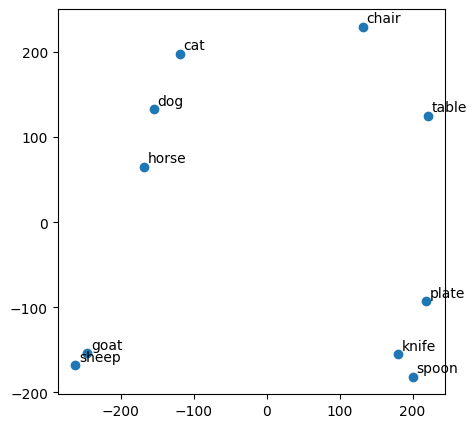

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(token_embeddings)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    ax.text(X_pca[i, 0]+5, X_pca[i, 1]+5, word)

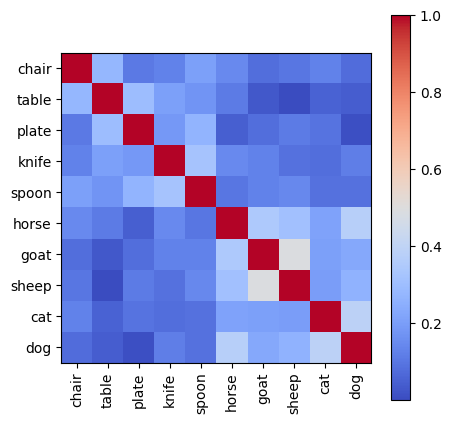

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(token_embeddings)
fig, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(cosine_similarity(token_embeddings), cmap="coolwarm")
fig.colorbar(cax)
plt.xticks(range(len(words)), words, rotation=90)
plt.yticks(range(len(words)), words);

## Token generation

In [15]:
import torch

input_sentence = "translate english to german: hello, how are you?"

tokens = tokenizer(input_sentence, return_tensors="pt")

decoder_input_ids = torch.tensor([[ tokenizer.pad_token_id ]])

print("Encoder's input")
print(tokens["input_ids"])

print()
print("Decoder's input")
print(decoder_input_ids)

Encoder's input
tensor([[13959, 22269,    12, 13692,    10, 21820,     6,   149,    33,    25,
            58,     1]])

Decoder's input
tensor([[0]])


In [18]:
# **tokens passes the dictionary as keyword arguments (input_ids=..., attention_mask=...)
output = model(**tokens, decoder_input_ids=decoder_input_ids)
print(output.keys())

odict_keys(['logits', 'past_key_values', 'encoder_last_hidden_state'])


In [19]:
print(output.logits.shape)

torch.Size([1, 1, 32128])


In [22]:
max_proba_token = output.logits[0,0]
max_proba_token

tensor([-20.4737,  -9.7094, -15.2374,  ..., -40.6805, -40.5435, -40.5263],
       grad_fn=<SelectBackward0>)

In [24]:
max_proba_token = output.logits[0,0].argmax()
print( output.logits[0,0][2501])
print(max_proba_token)
print("Max probability token:", max_proba_token.item())
print("Corresponding token:", tokenizer.decode(max_proba_token))

tensor(1.6548, grad_fn=<SelectBackward0>)
tensor(2501)
Max probability token: 2501
Corresponding token: Hall


instead of creating a loop we can use the generate() method in the model

In [25]:
max_length = 50
out_tokens = model.generate(**tokens, max_length=max_length)
tokenizer.batch_decode(out_tokens)

['<pad> Hallo, wie sind Sie?</s>']

## Cross-attention

We can now run the previous code, but now let's compute the cross-attention weights. This will help us understand what the model is paying attention to in the input sequence, when generating the next token.

To compute the attention weights, we need to reload the model, passing the output_attentions=True parameter. This will make the model return the attention weights for each layer.